In [167]:
import pandas as pd
import numpy as np 
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt


In [168]:
df = pd.read_csv("NFT_Sales.csv")

columns = df.columns
print(columns)

# Tiramos columna 1605 con valores negativos en ventas
df = df.drop([1605])

# Tiramos columna 0 por valores NaN
df = df.drop([0])

Index(['Date', 'Sales_USD_cumsum', 'Number_of_Sales_cumsum',
       'Active_Market_Wallets_cumsum', 'Primary_Sales_cumsum',
       'Secondary_Sales_cumsum', 'AverageUSD_cum', 'Sales_USD',
       'Number_of_Sales', 'Active_Market_Wallets', 'Primary_Sales'],
      dtype='object')


<Figure size 432x288 with 0 Axes>

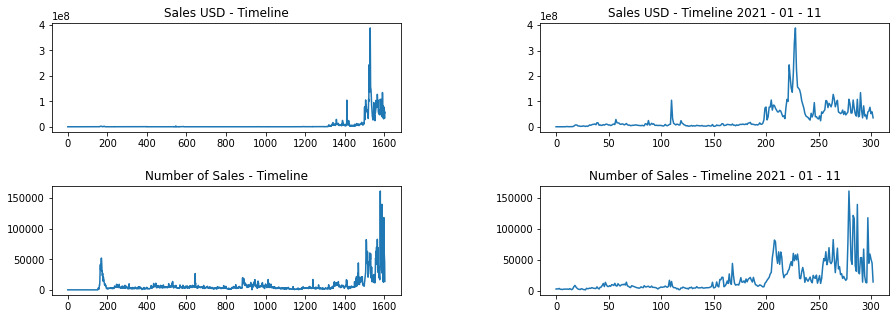

In [169]:
#Ventas de NFT 
plt.clf()
plt.figure(figsize = (15, 5))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(range(len(df.Sales_USD)), df.Sales_USD)
plt.title("Sales USD - Timeline")

ax2 = plt.subplot(2, 2, 2)
df["Index"] = range(len(df))
sales_values = df[df.Index > 1300]["Sales_USD"]
ax2.plot(range(len(sales_values)), sales_values)
plt.title("Sales USD - Timeline 2021 - 01 - 11")

ax3 = plt.subplot(2, 2, 3)
ax3.plot(range(len(df.Number_of_Sales)), df.Number_of_Sales)
plt.title('Number of Sales - Timeline')

ax4 = plt.subplot(2, 2, 4)
number_sales = df[df.Index > 1300]["Number_of_Sales"]
ax4.plot(range(len(number_sales)), number_sales)
plt.title('Number of Sales - Timeline 2021 - 01 - 11')

plt.subplots_adjust(wspace=0.4, hspace= 0.5)
plt.show()

El coeficiente de correlacion es:  0.6881891718468452


<Figure size 432x288 with 0 Axes>

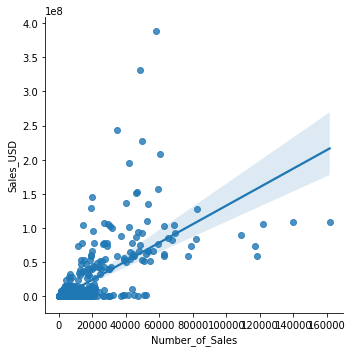

In [170]:
# Buscar correlacion entre variable Number of Sales - Sales USD
corr, _ = pearsonr(df.Sales_USD, df.Number_of_Sales)
print("El coeficiente de correlacion es: ", corr)

plt.clf()
sns.lmplot(data = df, y = "Sales_USD", x = "Number_of_Sales")
plt.show()

# Mas cantidad de ventas equivale a casi mas ventas dolares USD


In [193]:
#Pasar a ano y mes 
month_date = {}

def month(row):

    new_date = row.Date.split("-")
    new_date = new_date[0] + " - " + new_date[1]

    if not new_date in month_date.keys():
        # Creo diccionario
        month_date[new_date]= {}

        # Creo arreglo de segundo diccionario
        month_date[new_date]["Number of Sales"] = []
        month_date[new_date]["Sales USD"] = []


    elif new_date in month_date.keys():

        month_date[new_date]["Number of Sales"].append(row.Number_of_Sales)
        month_date[new_date]["Sales USD"].append(row.Sales_USD)
        

df.apply(month, axis = 1)


year_month = []
month_mean_sales = []
month_mean_number = []


# Diccionario con llave de ano mes
for key, value in month_date.items():
    year_month.append(key)
    # Segundo Diccionario con Sales - Number
    for key1, value1 in value.items():
        if key1 == "Number of Sales":
            month_mean_number.append(np.mean(value1))

        elif key1 == "Sales USD":
            month_mean_sales.append(np.mean(value1))


diccionario_convertido = {"Date": year_month, "Sales_USD": month_mean_sales, "Number_of_Sales": month_mean_number}
df_sales = pd.DataFrame.from_dict(diccionario_convertido)

<Figure size 432x288 with 0 Axes>

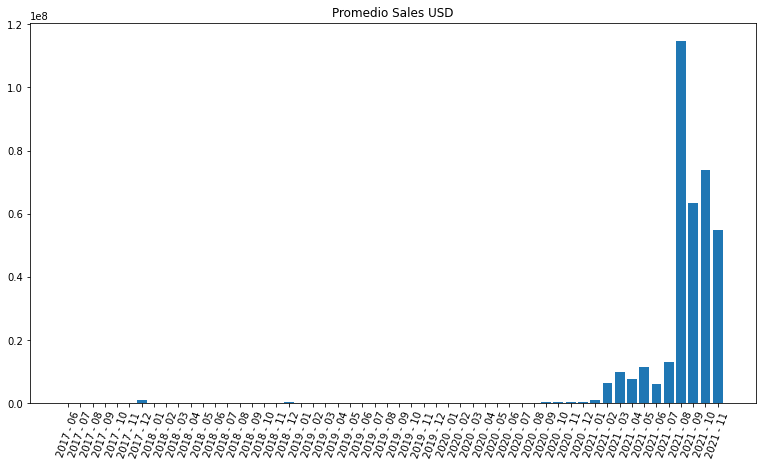

2019 - 04:  67676.9582758623
2021 - 08:  7618194.075172416
2017 - 12:  1130451.6489999997


In [223]:
# Plot de nuevo data frame df_sales
plt.clf()
plt.figure(figsize = (13, 7))
ax = plt.subplot()
plt.bar(range(len(df_sales.Date)), df_sales.Sales_USD)
ax.set_xticks(range(len(df_sales.Date)))
ax.set_xticklabels(df_sales.Date, rotation = 70, fontsize = 10)
plt.title("Promedio Sales USD")
plt.show()

print("2019 - 04: ", np.mean(month_date["2019 - 04"]["Sales USD"]))
print("2021 - 08: ", np.mean(month_date["2021 - 04"]["Sales USD"]))
print("2017 - 12: ", np.mean(month_date["2017 - 12"]["Sales USD"]))


In [221]:
# Desviacion Standard
# Desviacion 
print(np.std(df.Sales_USD))
print(np.std(df_sales.Sales_USD))
print(np.amax(df.Sales_USD))
print(np.amin(df.Sales_USD))

24859041.987209193
20927510.634724382
388636358.4899998
0.0


<Figure size 432x288 with 0 Axes>

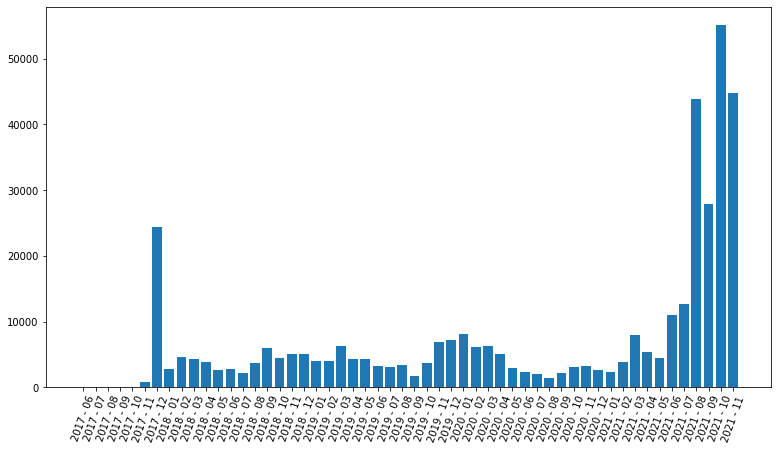

In [229]:
# Plot Number of Sales
plt.clf()
plt.figure(figsize = (13, 7))
ax = plt.subplot()
plt.bar(range(len(df_sales.Date)), df_sales.Number_of_Sales)
ax.set_xticks(range(len(df_sales.Date)))
ax.set_xticklabels(df_sales.Date, rotation = 70)
plt.show()

<Figure size 432x288 with 0 Axes>

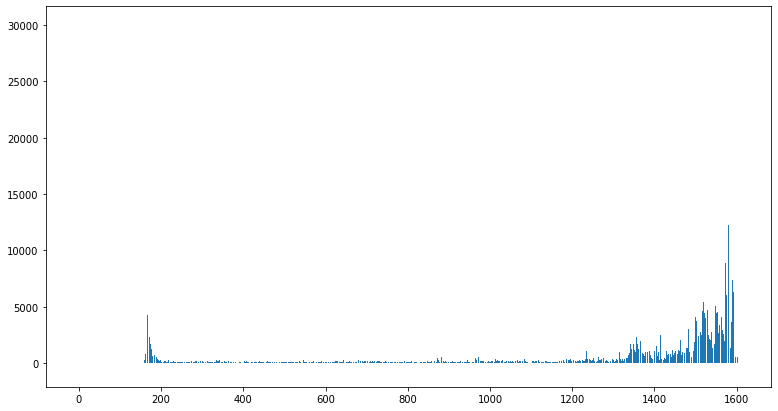

In [242]:
# Revisar las carteras activas 
df.Active_Market_Wallets = df.Active_Market_Wallets.fillna(np.mean(df.Active_Market_Wallets))
plt.clf()

plt.figure(figsize = (13, 7))
ax = plt.subplot()
plt.bar(range(len(df.Active_Market_Wallets)), df.Active_Market_Wallets)
plt.show()
